# PREDICCIÓN DE TASA DE ENFERMEDADES A PARTIR DE LA CALIDAD DEL AGUA

# ABSTRACT

Este notebook presenta un análisis de un dataset que indaga la relación entre la contaminación de agua y la prevalencia de enfermedades transmitidas por el agua contaminada o sin tratar, en diversos países, abarcando un período de 26 años. El objetivo principal fue investigar patrones y correlación entre indicadores como calidad de agua, socioeconómicos, saneamiento y enfermedades como diarrea, cólera, fiebre tifoidea y analizar el impacto del agua sin tratar en la salud de la población. Como puntapié inicial se plantearon interrogantes que comparan la relación existente o no entre variables como PBI per cápita, acceso a agua de saneamiento y enfermedades por agua contaminada, y relaciones entre variables como fiebre tifoidea, acceso a atención médica, presencia de bacterias en fuentes de agua y mortalidad infantil. A partir de las hipótesis planteadas es que se llevó a cabo un análisis exploratorio utilizando metodologías Pandas, Matplotlib y Seaborn. Se inició con análisis de visualizaciones univariadas y bivariadas con el fin de comprender la distribución y relación de las variables. Los resultados observados del análisis no evidenciaron una correlación lineal directa entre las variables analizadas, pero si se observa una distribución aleatoria. Esto sugiere que las relaciones directas y lineales esperables entre estas variables no son evidentes. Se observa también que el análisis de valores atípicos en variables como el PBI per cápita no reveló puntos extremos que distorsionen significativamente la distribución global.

# METADATA

1.   Descripción de los datos

Datos sobre la relación entre la contaminación de agua y las enfermedades causadas por agua contaminada. El conjunto de datos proporciona información sobre diferentes paises.

Características del dataset:

*   3000 filas
*   24 columnas
*   Periodo: 2020-2025
*   Fuente: [https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease]

2.   Glosario

*  Contaminant Level (ppm): Nivel de contaminación medido en ppm (parte por millón).
*   pH Level: Nivel de pH de agua, siendo pH 7 neutro, pH menor a 7 básico, y pH mayor a 7 ácido.
*   Turbidity (NTU): Medida de turbidez en el agua, presencia de partículas en suspensión.
*   Dissolved Oxygen (mg/L): Oxígeno disuelto en el agua.
*   Nitrate Level (mg/L): Concentración de nitratos en el agua.
*   Lead Concentration (µg/L): Concentración de plomo en agua.
*   Bacteria Count (CFU/mL): Recuento de bacterias, expresada en unidades formadoras de colonia por mL.
*   Urbanization Rate (%): Porcentaje de población que vive en zona urbana.
*   Healthcare Access Index (0-100): Acceso a la atención médica.
*   Water Treatment Method: proceso utilizado para mejorar la calidad del agua.
*   Access to Clean Water (% of Population): % de población con acceso a agua potable.
*   Diarrheal Cases per 100,000 people: casos de diarrea cada 100000 habitantes.
*   Cholera Cases per 100,000 people: casos de cólera cada 100000 habitantes.
*   Typhoid Cases per 100,000 people: fiebre tifoidea cada 100000 habitantes.
*   Infant Mortality Rate (per 1,000 live births): tasa de mortalidad infantil.
*   GDP per Capita (USD): Producto interno Bruto expresado en dólares.
*   Sanitation Coverage (% of Population): Porcentaje de personas con acceso a saneamiento.
*   Rainfall (mm per year): Cantidad de lluvia por año.
*   Population Density (people per km²): número de habitantes que viven en un área de un kilómetro cuadrado.
*   Water Source Type: Origen del suministro de agua.

# OBJETIVO

El fin del presente trabajo es investigar brotes de enfermedades según la calidad del agua y analizar como afecta el agua contaminada en la salud de la población.

# HIPOTESIS

- Se prevé que los países con un menor PBI per cápita tienen acceso a agua de saneamiento insuficiente que contribuyen a la transmisión de enfermedades como el cólera, diarreas, fiebre tifoidea, entre otras en comparación con los países con un mayor PBI. Esto sugiere que el desarrollo económico es proporcional a la  inversión en saneamiento y por consiguiente, la mitigación de dichas enfermedades hídricas.

- El aumento de casos de fiebre tifoidea es directamente proporcional a una mayor presencia de bacterias en las fuentes de agua. Así mismo, está relación se ve mitigada significativamente en regiones con un mayor acceso a la atención médica, lo que se traduce en una reducción de la tasa de mortalidad infantil asociada a dicha enfermedad.

# IMPORTACIÓN DE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1A_32XyWeCN2k3dqukMHyd3yzuY8NMdbD15e6mZLjt08

# https://docs.google.com/spreadsheets/d/1A_32XyWeCN2k3dqukMHyd3yzuY8NMdbD15e6mZLjt08/edit?usp=sharing


Downloading...
From (original): https://drive.google.com/uc?id=1A_32XyWeCN2k3dqukMHyd3yzuY8NMdbD15e6mZLjt08
From (redirected): https://docs.google.com/spreadsheets/d/1A_32XyWeCN2k3dqukMHyd3yzuY8NMdbD15e6mZLjt08/export?format=xlsx
To: /content/water_pollution_disease.xlsx
379kB [00:00, 90.5MB/s]


# VISUALIZACIÓN DE DATASET

In [ ]:
df = pd.read_excel('water_pollution_disease.xlsx')
df

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (øC),Population Density (people per kmı)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,179,141,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,185,123,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,175,54,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,331,179,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,354,101,58.78,25661,23.03,55.55,69.23,2295,31.44,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nigeria,East,2002,Tap,2.82,7.40,4.43,9.69,37.58,18.52,...,157,84,73.77,21255,75.34,15.22,53.06,264,31.64,882
2996,Nigeria,North,2019,Lake,8.13,8.33,4.77,7.62,38.05,16.98,...,297,250,71.11,79148,6.91,22.89,78.45,2699,33.21,67
2997,USA,South,2009,Pond,1.18,6.76,4.75,7.07,36.13,7.99,...,129,86,96.63,48569,86.17,85.89,47.38,1052,11.57,643
2998,Pakistan,South,2009,Pond,7.56,6.12,3.49,8.93,25.30,19.86,...,309,169,20.71,49099,20.50,20.78,23.34,369,14.69,643


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (æg/L)                      3000 

In [ ]:
df.describe().T

LIMPIEZA DE DATOS

In [ ]:
df.isnull()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (øC),Population Density (people per kmı)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Chequeo de Nulos

df.isnull().sum()

,0
Country,0
Region,0
Year,0
Water Source Type,0
Contaminant Level (ppm),0
pH Level,0
Turbidity (NTU),0
Dissolved Oxygen (mg/L),0
Nitrate Level (mg/L),0
Lead Concentration (æg/L),0


In [ ]:
df['Water Treatment Method'].isnull()

,Water Treatment Method
0,False
1,False
2,True
3,False
4,False
...,...
2995,True
2996,False
2997,False
2998,False


In [ ]:
# Filtro por método de tratamiento del agua

df[df['Water Treatment Method'].isnull()]

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (øC),Population Density (people per kmı)
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,175,54,48.45,86022,58.37,72.86,93.56,2074,21.73,57
5,Ethiopia,West,2013,Tap,2.93,8.21,4.03,8.66,31.35,16.74,...,108,98,70.13,84334,53.45,86.11,51.11,2530,8.01,775
7,Mexico,Central,2024,Spring,3.76,6.42,1.35,9.99,2.73,19.44,...,110,70,67.30,76593,7.27,45.22,70.22,940,19.64,111
8,Indonesia,North,2014,Well,0.63,6.29,1.42,9.67,28.31,1.93,...,99,37,44.32,5470,47.62,69.40,69.77,2150,36.23,538
16,India,West,2024,Pond,7.48,6.83,3.34,5.39,6.78,13.27,...,221,309,2.07,7630,67.63,42.10,63.28,2051,20.13,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,India,North,2016,Tap,9.92,7.57,3.24,4.20,37.49,3.91,...,266,197,48.85,27819,99.20,29.00,48.27,854,32.39,418
2989,USA,West,2004,Tap,5.79,7.95,1.07,5.74,7.77,9.58,...,145,115,14.72,89174,40.06,64.66,28.21,1858,31.71,248
2991,China,Central,2021,River,0.80,7.01,4.80,4.70,28.64,13.31,...,210,79,43.10,96782,86.77,53.75,37.11,1175,35.30,804
2993,Mexico,West,2009,Well,1.98,7.71,1.26,6.30,41.30,13.18,...,159,47,21.85,19818,93.55,79.98,84.55,718,36.89,719


In [ ]:
# Reemplazo nulos por un valor

df['Water Treatment Method'] = df['Water Treatment Method'].fillna('S/datos')

In [ ]:
df[df['Water Treatment Method']== 'S/datos']

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (øC),Population Density (people per kmı)
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,175,54,48.45,86022,58.37,72.86,93.56,2074,21.73,57
5,Ethiopia,West,2013,Tap,2.93,8.21,4.03,8.66,31.35,16.74,...,108,98,70.13,84334,53.45,86.11,51.11,2530,8.01,775
7,Mexico,Central,2024,Spring,3.76,6.42,1.35,9.99,2.73,19.44,...,110,70,67.30,76593,7.27,45.22,70.22,940,19.64,111
8,Indonesia,North,2014,Well,0.63,6.29,1.42,9.67,28.31,1.93,...,99,37,44.32,5470,47.62,69.40,69.77,2150,36.23,538
16,India,West,2024,Pond,7.48,6.83,3.34,5.39,6.78,13.27,...,221,309,2.07,7630,67.63,42.10,63.28,2051,20.13,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,India,North,2016,Tap,9.92,7.57,3.24,4.20,37.49,3.91,...,266,197,48.85,27819,99.20,29.00,48.27,854,32.39,418
2989,USA,West,2004,Tap,5.79,7.95,1.07,5.74,7.77,9.58,...,145,115,14.72,89174,40.06,64.66,28.21,1858,31.71,248
2991,China,Central,2021,River,0.80,7.01,4.80,4.70,28.64,13.31,...,210,79,43.10,96782,86.77,53.75,37.11,1175,35.30,804
2993,Mexico,West,2009,Well,1.98,7.71,1.26,6.30,41.30,13.18,...,159,47,21.85,19818,93.55,79.98,84.55,718,36.89,719


In [ ]:
# Chequeo de nulos

df.isnull().sum()

,0
Country,0
Region,0
Year,0
Water Source Type,0
Contaminant Level (ppm),0
pH Level,0
Turbidity (NTU),0
Dissolved Oxygen (mg/L),0
Nitrate Level (mg/L),0
Lead Concentration (æg/L),0


# VISUALIZACIÓN

Análisis

In [ ]:
# Conteo de registro de tipo de fuente de agua

df['Water Source Type'].value_counts()

,count
Water Source Type,
River,538
Spring,532
Tap,501
Well,498
Lake,481
Pond,450


<Axes: xlabel='Water Source Type', ylabel='count'>

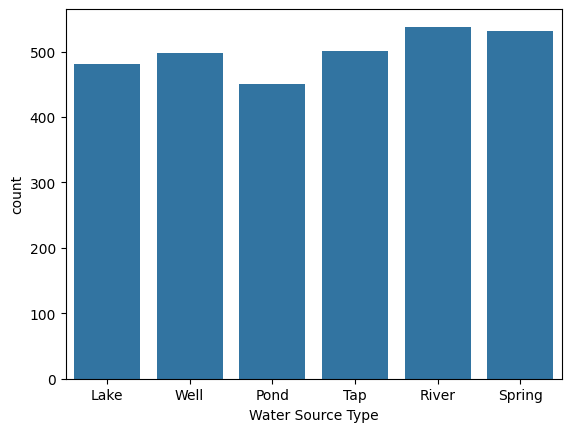

In [ ]:
# Gráfico de frecuencia por tipo de fuente de agua

sns.countplot(x='Water Source Type', data=df)

<Axes: xlabel='Water Treatment Method', ylabel='count'>

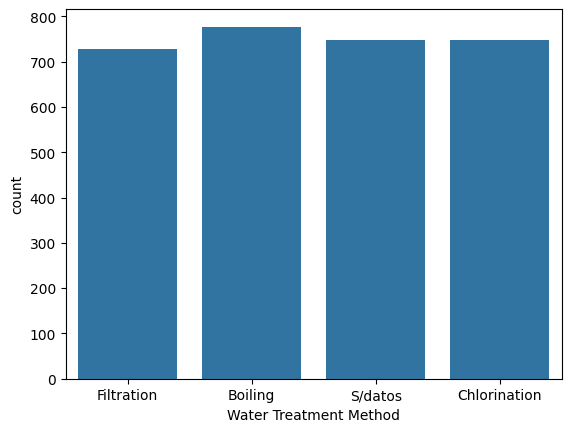

In [ ]:
# Conteo de registro Tratamiento de agua

df['Water Treatment Method'].value_counts()


# Gráfico de frecuencia por tratamiento de agua

sns.countplot(x='Water Treatment Method', data=df)

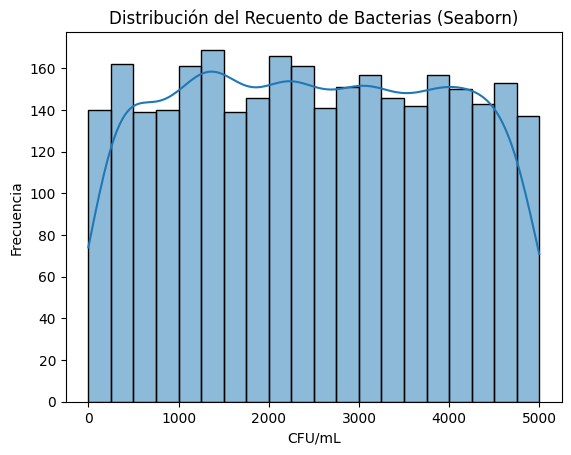

In [ ]:
# Recuento de bacterias en el agua

plt.figure()
sns.histplot(df['Bacteria Count (CFU/mL)'], bins=20, kde=True)
plt.title('Distribución del Recuento de Bacterias (Seaborn)')
plt.xlabel('CFU/mL')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='GDP per Capita (USD)', ylabel='Sanitation Coverage (% of Population)'>

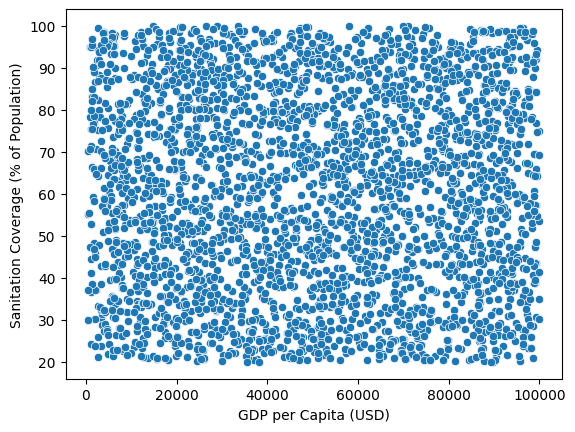

In [ ]:
# Gráfico de dispersión - Relación entre el PBI y la cobertura de saneamiento

sns.scatterplot(x='GDP per Capita (USD)', y='Sanitation Coverage (% of Population)', data=df)

Text(0.5, 1.0, 'Cobertura de Saneamiento vs. Casos de Diarrea')

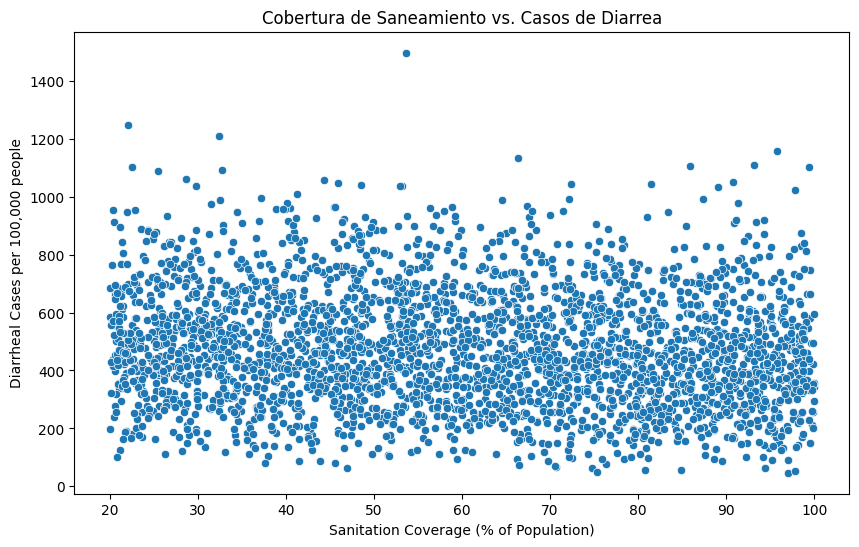

In [ ]:
# Gráfico de dispersión - Relación entre la cobertura de saneamiento y los casos de diarrea

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sanitation Coverage (% of Population)', y='Diarrheal Cases per 100,000 people', data=df)
plt.title('Cobertura de Saneamiento vs. Casos de Diarrea')

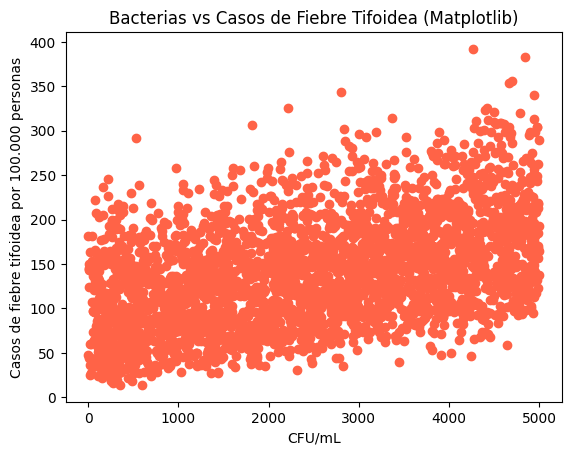

In [ ]:
# Gráfico de dispersión para ver la relación entre la presencia de bacterias y los casos de fiebre tifoidea

plt.figure()
plt.scatter(df['Bacteria Count (CFU/mL)'], df['Typhoid Cases per 100,000 people'], color='tomato')
plt.title('Bacterias vs Casos de Fiebre Tifoidea (Matplotlib)')
plt.xlabel('CFU/mL')
plt.ylabel('Casos de fiebre tifoidea por 100.000 personas')
plt.show()

In [ ]:
# Casos de diarrea por tratamiento y origen de agua

casos_diarrea = df.groupby(['Water Source Type', 'Water Treatment Method'])['Diarrheal Cases per 100,000 people'].mean()
casos_diarrea

Water Source Type  Water Treatment Method
Lake               Boiling                   480.492308
                   Chlorination              443.879032
                   Filtration                473.216981
                   S/datos                   512.586777
Pond               Boiling                   467.266129
                   Chlorination              473.055046
                   Filtration                452.675926
                   S/datos                   447.385321
River              Boiling                   484.436620
                   Chlorination              490.713115
                   Filtration                455.920863
                   S/datos                   466.518519
Spring             Boiling                   506.176923
                   Chlorination              453.448980
                   Filtration                491.357724
                   S/datos                   500.553030
Tap                Boiling                   469.355932
                   Chlorination              500.142857
                   Filtration                459.720280
                   S/datos                   454.619835
Well               Boiling                   476.015038
                   Chlorination              490.519685
                   Filtration                493.165138
                   S/datos                   487.031008
Name: Diarrheal Cases per 100,000 people, dtype: float64

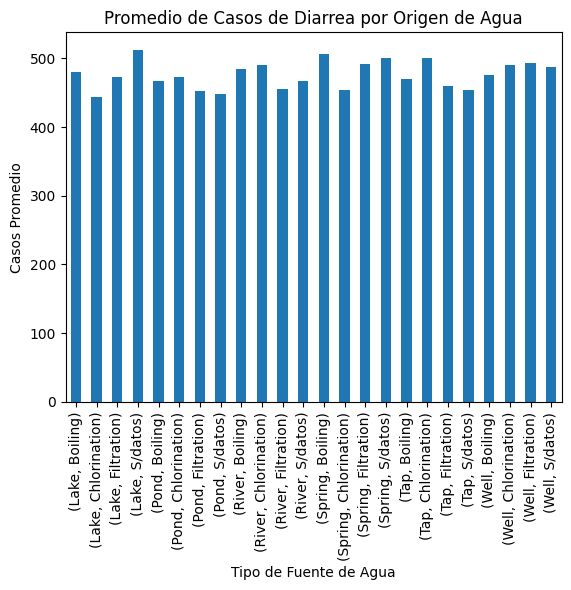

In [ ]:
casos_diarrea.plot(kind='bar')
plt.title('Promedio de Casos de Diarrea por Origen de Agua')
plt.xlabel('Tipo de Fuente de Agua')
plt.ylabel('Casos Promedio')
plt.show()

# VALORES ATÍPICOS

<Axes: xlabel='Healthcare Access Index (0-100)'>

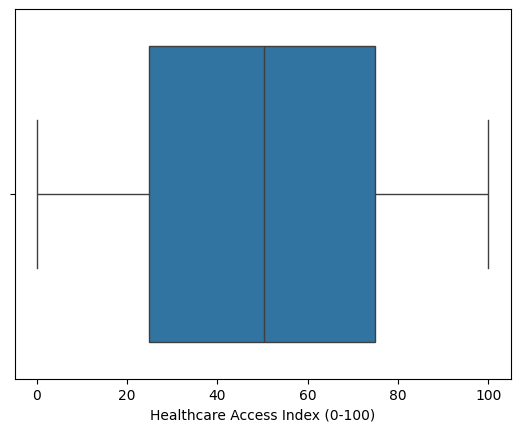

In [ ]:
sns.boxplot(x='Healthcare Access Index (0-100)',data=df)

<Axes: xlabel='Sanitation Coverage (% of Population)'>

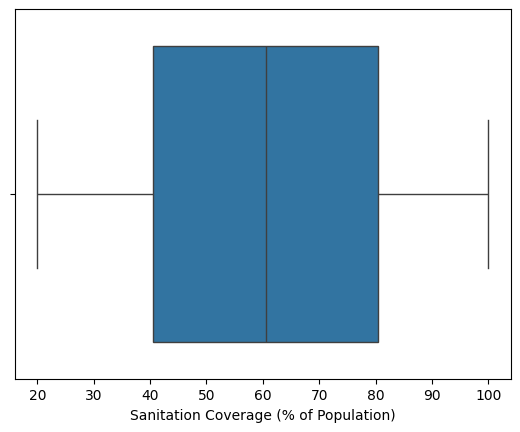

In [ ]:
sns.boxplot(x='Sanitation Coverage (% of Population)',data=df)

<Axes: xlabel='Typhoid Cases per 100,000 people'>

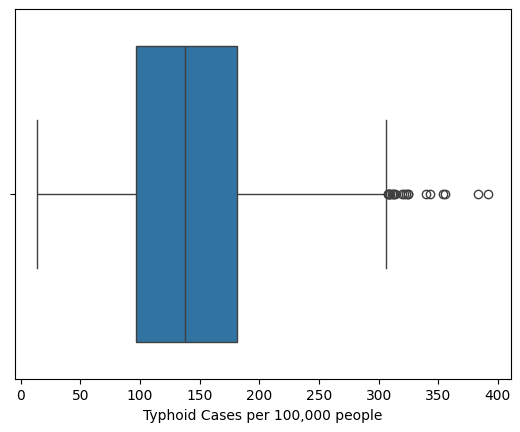

In [ ]:
sns.boxplot(x='Typhoid Cases per 100,000 people',data=df)

<Axes: xlabel='GDP per Capita (USD)', ylabel='Sanitation Coverage (% of Population)'>

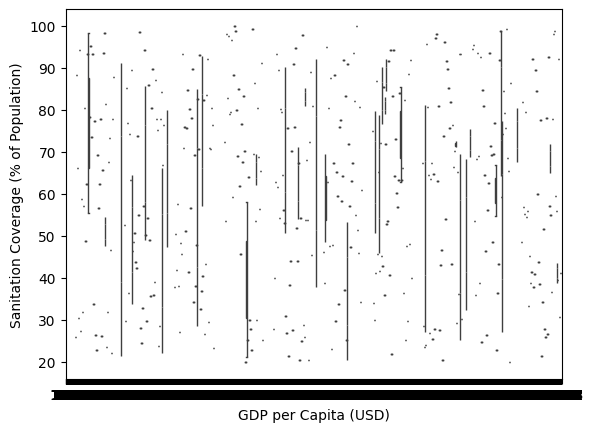

In [ ]:
sns.boxplot(x='GDP per Capita (USD)', y='Sanitation Coverage (% of Population)', data=df)

# CONCLUSIÓN

Al realizar el análisis bivariado de las variables involucradas en las hipótesis planteadas, se observó que la mayoría de los gráficos de dispersión (por ejemplo, entre PBI per cápita vs cobertura de saneamiento; y conteo de bacterias en agua vs casos de fiebre tifoidea; cobertura de saneamiento vs casos de diarrea; acceso a la salud vs mortalidad infantil) muestran una distribución de puntos aleatoria. Esto sugiere que las relaciones directas y lineales esperadas entre estas variables no son evidentes. Podría considerarse que la alta variabilidad de los datos podría estar contribuyendo a la ausencia de correlación lineal directa, aunque el análisis de valores atípicos (outliers) en variables como el PBI per cápita no reveló puntos extremos que distorsionen significativamente la distribución global.

# TRANSFORMACIÓN DE VARIABLES

In [ ]:
df['Country'].value_counts()

,count
Country,
USA,319
Nigeria,315
China,311
Indonesia,304
Pakistan,298
Ethiopia,293
Bangladesh,291
Brazil,291
India,290


In [ ]:
df['Water Source Type'].value_counts()

,count
Water Source Type,
River,538
Spring,532
Tap,501
Well,498
Lake,481
Pond,450


In [ ]:
df['Water Treatment Method'].value_counts()

,count
Water Treatment Method,
Boiling,777
Chlorination,748
S/datos,747
Filtration,728


In [ ]:
# Columnas categóricas

col_categ = ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']

In [ ]:
categ_dummies = pd.get_dummies(df, columns=col_categ, drop_first=True)

categ_col = categ_dummies.astype(int)


print(categ_col.shape)

(3000, 41)


In [ ]:
df = categ_col
df.head(10)

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people",...,Region_South,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_S/datos
0,2015,6,7,3,4,8,7,3344,33,674,...,0,0,0,0,0,0,0,0,1,0
1,2017,5,7,4,3,15,14,2122,89,448,...,0,1,0,0,0,0,1,0,0,0
2,2022,0,6,0,3,36,9,2330,35,302,...,0,0,1,0,0,0,0,0,0,1
3,2016,7,6,1,3,36,6,3779,57,870,...,0,0,0,0,0,0,1,0,0,0
4,2005,0,8,4,9,49,12,4182,36,413,...,1,0,0,0,0,0,1,0,1,0
5,2013,2,8,4,8,31,16,880,69,255,...,0,1,0,0,0,1,0,0,0,1
6,2022,0,6,3,6,44,1,2977,55,417,...,0,0,0,1,0,0,0,0,0,0
7,2024,3,6,1,9,2,19,1172,44,380,...,0,0,0,0,1,0,0,0,0,1
8,2014,0,6,1,9,28,1,159,71,87,...,0,0,0,0,0,0,1,0,0,1
9,2013,9,6,0,7,45,10,2493,55,699,...,0,0,0,0,0,0,1,1,0,0


# SELECCIÓN DE VARIABLES

In [ ]:
X = df.drop('Diarrheal Cases per 100,000 people', axis=1)

y = df['Diarrheal Cases per 100,000 people'].values

In [ ]:
# Validación del primer registro

X[0:1]

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Cholera Cases per 100,000 people",...,Region_South,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_S/datos
0,2015,6,7,3,4,8,7,3344,33,179,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#  Validación de primer registro

y[0:1]

array([674])

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Datos X_train

X_train

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Cholera Cases per 100,000 people",...,Region_South,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_S/datos
1732,2007,2,6,4,6,10,19,3648,57,195,...,0,0,1,0,0,0,0,0,0,0
2440,2021,5,7,2,9,13,15,846,78,91,...,1,0,0,0,0,0,1,0,1,0
1232,2003,5,7,0,9,47,6,4762,42,348,...,0,0,0,0,1,0,0,1,0,0
1081,2016,4,8,0,5,32,15,3039,96,182,...,1,0,0,0,0,1,0,0,1,0
2920,2023,0,7,2,4,1,14,3716,75,387,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2019,2,7,2,7,9,14,2713,48,269,...,0,1,0,0,0,1,0,1,0,0
835,2014,2,6,4,8,1,4,2612,84,198,...,0,0,1,0,0,0,0,1,0,0
1653,2017,9,6,3,5,14,10,4574,73,416,...,0,0,1,0,0,0,0,0,1,0
2607,2021,3,6,1,9,27,6,1324,66,166,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Datos X_test

X_test

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (æg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Cholera Cases per 100,000 people",...,Region_South,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_S/datos
311,2013,0,7,0,7,18,15,1903,70,264,...,0,0,1,0,0,0,0,0,1,0
1025,2002,1,6,2,9,23,4,1942,43,230,...,0,0,0,0,1,0,0,1,0,0
1587,2004,5,8,0,5,15,12,2096,73,265,...,0,0,0,0,0,0,1,0,0,0
2941,2001,5,6,0,7,2,3,559,46,197,...,0,0,0,0,0,0,0,1,0,0
2980,2015,0,8,3,7,20,8,654,54,84,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,2023,2,7,1,7,41,5,3294,87,204,...,0,1,0,0,0,0,0,0,0,0
1612,2008,8,7,3,5,17,11,598,78,172,...,0,0,0,0,0,0,1,1,0,0
757,2018,6,7,1,9,11,7,2386,88,207,...,1,0,0,0,0,1,0,0,0,1
39,2010,2,7,0,7,27,3,681,65,120,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
# Datos X_train

y_train

array([457, 431, 711, ..., 796, 176, 763])

In [ ]:
# Datos y_test

y_test

array([ 340,  361,  454,  355,  154,  384,  335,  351,  574,  706,  492,
        523,  826,  537,  899,  272,  536,  402,  474,  846,  311,  391,
        254,  370,  246,  438,  557,  437,  930,  689,  580,  319,  328,
        324,  356, 1038,  734,  536,  611,  239,  727,   56,  589,  259,
        791,  250,  367,  408,  580,  476,  271,  420,  596,  279,  543,
        470,  664,  406,  680,  737,  388,  560,  456,  466,  292,  734,
        649,  421, 1105,  428,  387, 1061,  228,  516,  770,  764,  262,
        176,  676,  271,  355,  567,  538,  408,  628,  592,  176,  367,
        396,  665,  194,  510,  190,  264,  418,  384,  393,  252,  328,
        549,  216,  871,  300,   71,  226,  795,  439,  499,  162,  579,
        410,  198,  810,  223,  212,  884,  705,  532,  644,  457,  368,
        420,  309,  302,  483,  446,  284,  427,  836,  692,  367,  282,
        498,  315,  343,  370,  592,  588,  435,  960,  430,  763,  151,
        554,  395,  384,  633,  388,  231,  152,  1

In [ ]:
# Cantidad de Datos Parciales

X_train.shape, X_test.shape

((2100, 40), (900, 40))

In [ ]:
# Cantidad de Datos Parciales

y_train.shape, y_test.shape

((2100,), (900,))

# ENTRENAMIENTO

REGRESIÓN LINEAL

In [ ]:
# Entrenamiento del modelo

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

np.float64(428.9792051730627)

In [ ]:
regressor.coef_


array([-1.11585757e-01,  4.05822041e+01,  1.06933476e+00, -9.43645265e-03,
       -5.66116977e-01,  1.78659947e-01,  3.38824122e-01,  7.86288542e-02,
       -9.73190071e-01, -1.06040160e-02,  1.01851228e-01,  3.28748806e-02,
       -2.16339833e-05,  6.13270204e-02,  6.33138203e-02, -9.18870975e-01,
       -3.12956178e-03, -3.58510469e-01, -7.85071690e-03, -6.81107686e-01,
       -1.45252136e+00,  2.59155177e+01, -1.28736782e+01, -1.30825625e+00,
       -1.14948676e+01,  4.94876374e+00, -6.50203186e+00,  5.37350326e-01,
        2.49302581e+00,  7.85667063e-01,  4.68169962e+00, -6.32104581e+00,
       -5.29089618e+00,  8.84685438e-01,  8.31523757e+00, -4.73259284e+00,
        2.23205364e+00, -6.24054752e-01, -9.75894498e+00, -3.52671620e-01])

In [ ]:
# Realizando las predicciones

y_pred = regressor.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

,Actual,Predicted
0,340,247.320233
1,361,318.758778
2,454,493.614600
3,355,411.387926
4,154,118.311070
...,...,...
895,397,379.705676
896,526,476.496087
897,470,472.965275
898,221,218.555195


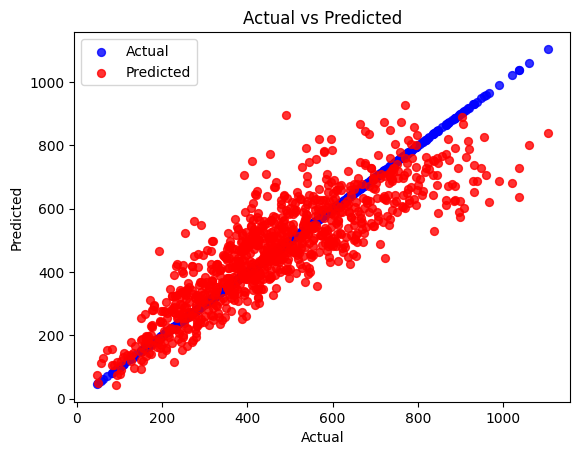

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred['Actual'], pred['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(pred['Actual'], pred['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

MÉTRICAS

In [ ]:
# Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)

from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test,y_pred))

El MSE es: 10399.779598860354


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)

from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

El RMSE es: 101.9793096606383


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)

from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test,y_pred))

El MAE es: 77.44424656493004


In [ ]:
# R Cuadrado

from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test,y_pred))

El R^2 es: 0.7289482753305083


Random Regressor

In [ ]:
X = df.drop('Diarrheal Cases per 100,000 people', axis=1)

y = df['Diarrheal Cases per 100,000 people'].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X, y)



RandomForestRegressor(random_state=42)

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

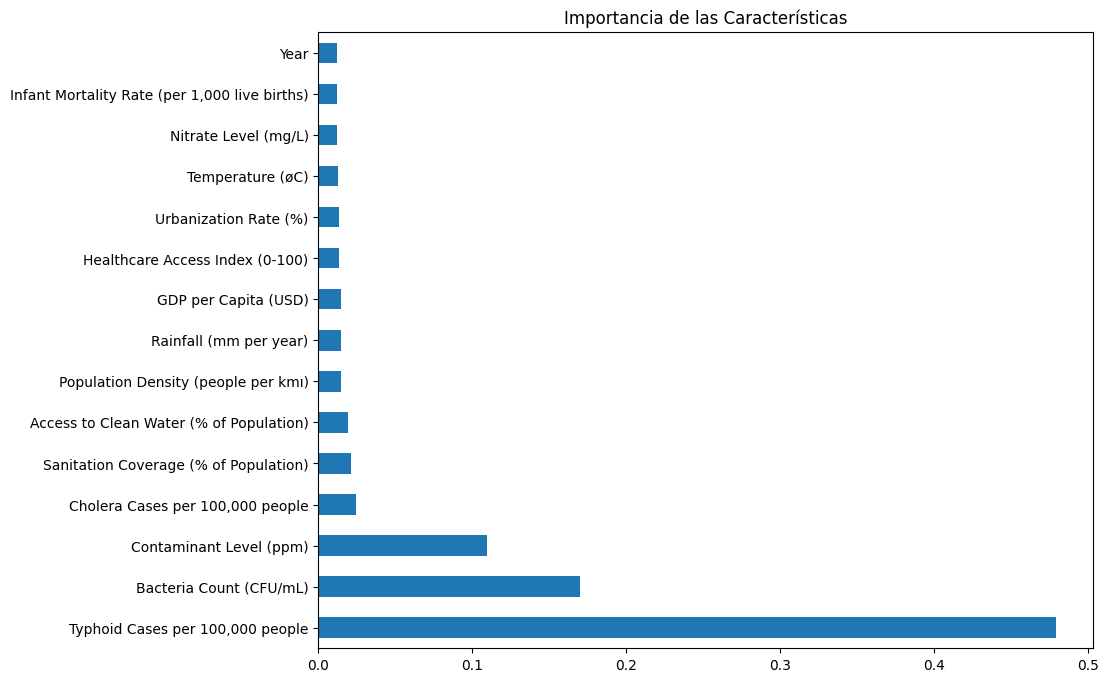

In [ ]:
plt.figure(figsize=(10, 8))
feature_importances.head(15).plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()

In [ ]:
#Realizando las predicciones

y_pred = regressor.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

,Actual,Predicted
0,340,247.320233
1,361,318.758778
2,454,493.614600
3,355,411.387926
4,154,118.311070
...,...,...
895,397,379.705676
896,526,476.496087
897,470,472.965275
898,221,218.555195


MÉTRICAS

In [ ]:
# Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)

from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test,y_pred))

El MSE es: 10399.779598860354


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)

from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

El RMSE es: 101.9793096606383


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)

from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test,y_pred))

El MAE es: 77.44424656493004


In [ ]:
# R Cuadrado

from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test,y_pred))

El R^2 es: 0.7289482753305083


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Puntuación R-cuadrado (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 10399.78
Raíz del Error Cuadrático Medio (RMSE): 101.98
Error Absoluto Medio (MAE): 77.44
Puntuación R-cuadrado (R²): 0.73


In [ ]:
promedio_y = np.mean(y)
desviacion_estandar_y = np.std(y)

In [ ]:
print(f"Promedio de la variable objetivo: {promedio_y:.2f}")
print(f"Desviación estándar de la variable objetivo: {desviacion_estandar_y:.2f}")
print(f"RMSE del modelo: 101.98")

Promedio de la variable objetivo: 476.22
Desviación estándar de la variable objetivo: 197.10
RMSE del modelo: 101.98


# CONCLUSIÓN



Analizando los parámetros obtenidos tanto del modelo de regresión lineal como el de Random Regresor, se observa que los modelos tienen una relación significativa en los datos ya que se obtuvo en R2 de 0.73 lo que significa que los modelos predicen que un 73% de los casos de diarrea pueden deberse a variables de contaminación, socioeconómicas y demográficas.
Se observa también precisión en la predicción de datos ya que el RMSE de 101.98 es menor al promedio de la variable objetivo 476.22 y a la desviación estándar 197.1, es decir, el error es menor a la variabilidad de los datos.
Estos resultados sugieren que: la mejora en condiciones de salud y el saneamiento en la población están intrínsecamente ligado a factores demográficos y socioeconómicos, así como a las condiciones ambientales.
Si bien el modelo de regresión lineal cumple con el objetivo de predecir las variables ya que asume una relación lineal, se podría mejorar las predicciones con un modelo avanzado para capturar aún más la variabilidad de los datos.
